##### Importing the libraries 

In [1]:

# Standard Python libs
import warnings
import typing
from datetime import datetime

# Data science libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
from ydata_profiling import ProfileReport


# Use the warnings filter context manager to ignore specific warnings
with warnings.catch_warnings():
    # Filter out Pandas warnings
    warnings.filterwarnings("ignore", category=FutureWarning)

## 1. Data Understanding

### 1.1 Load dataset as DataFrame to view data

In [2]:
df = pd.read_csv("loan.csv")
df.head(10)

/Users/geotech/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py:3526: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
df['dti']

0        27.65
1         1.00
2         8.72
3        20.00
4        17.94
         ...  
39712    11.33
39713     6.40
39714     2.30
39715     3.72
39716    14.29
Name: dti, Length: 39717, dtype: float64

### 1.2 Profiling Whole Dataframe with ProfileReport

In [4]:
# profile = ProfileReport(
#     df, title="Profiling Report for Loan dataset",
#     dark_mode=True
# )
# profile.to_file("profiling_result.html")

# print("====== Open file profiling_result.html on the browser to view profiling result")

### 1.3 Indentify Data Quality Issue

- Invalid Values
    - Unicode
    - Incorrect Data Type
    - Accepted Values
    - Format structure
    - Internal rules (sanity check)

- 

##### Columns having high number of missing values
- next_pymnt_d 
- mths_since_last_record
- mths_since_last_delinq
- desc 
##### Columns having only one value thoughout the rows
- initial_list_status
- acc_now_delinq
- application_type
- chargeoff_within_12_mths
- collections_12_mths_ex_med
- delinq_amnt
- pymnt_plan

##### Columns having most of the values are 0 and remaining are outliers
- tax_liens
- recoveries
- total_rec_late_fee
- out_prncp_inv
- pub_rec_bankruptcies
- policy_code
- pub_rec
- out_prncp
- delinq_2yrs
- collection_recovery_fee 

### 1.4 Interpreted The Meaning of Fields

##### Data info
- It contains the complete loan data for all loans issued through the time period 2007 t0 2011 (given in module introduction).
- There are 39717 rows and 111 columns
- There are 54 columns with highest missing values 39717. I think we should remove these after looking into it carefully. Some of them might be ouput columns where we need to find the values.
- Also few columns are there with many missing values. Some columns contain 1k, 2.4k, 12.9k, 25k, 37k, 38k missing values in it.

## 2. Data Cleaning and Manipulation

### 2.1 Address Data Quality Issue

- Fix columns
    - Add columns name of missing
    - Rename columns consistently
    - Delete unnessesary columns
    - Split columns for more data
    - Merge columns for identifier
    - Align missalign columns

- Fix rows
    - Delete incorrect rows
    - Delete summary rows
    - Delete extra rows

- Fix missing values
    - Set values as missing (treat blank strings, "NA", "XX", "999", etc. as missing.)
    - Fill missing values with 
        - Constant (e.g zero)
        - Default values
        - Statistic value (e.g mode, mean, median, mix, max,....)
        - External data
    - Fill partial missing values using business judgement

- Filter data
    - Deduplicate Data by unique fields
    - Filter rows by segments, date periods
    - Filter columns pick relevant columns to analysis
    - Aggregate data

- Stadardize data
    - Remove extra characters
    - Standardize case (e.g UPPERCASE or lowercase)
    - Standardize format


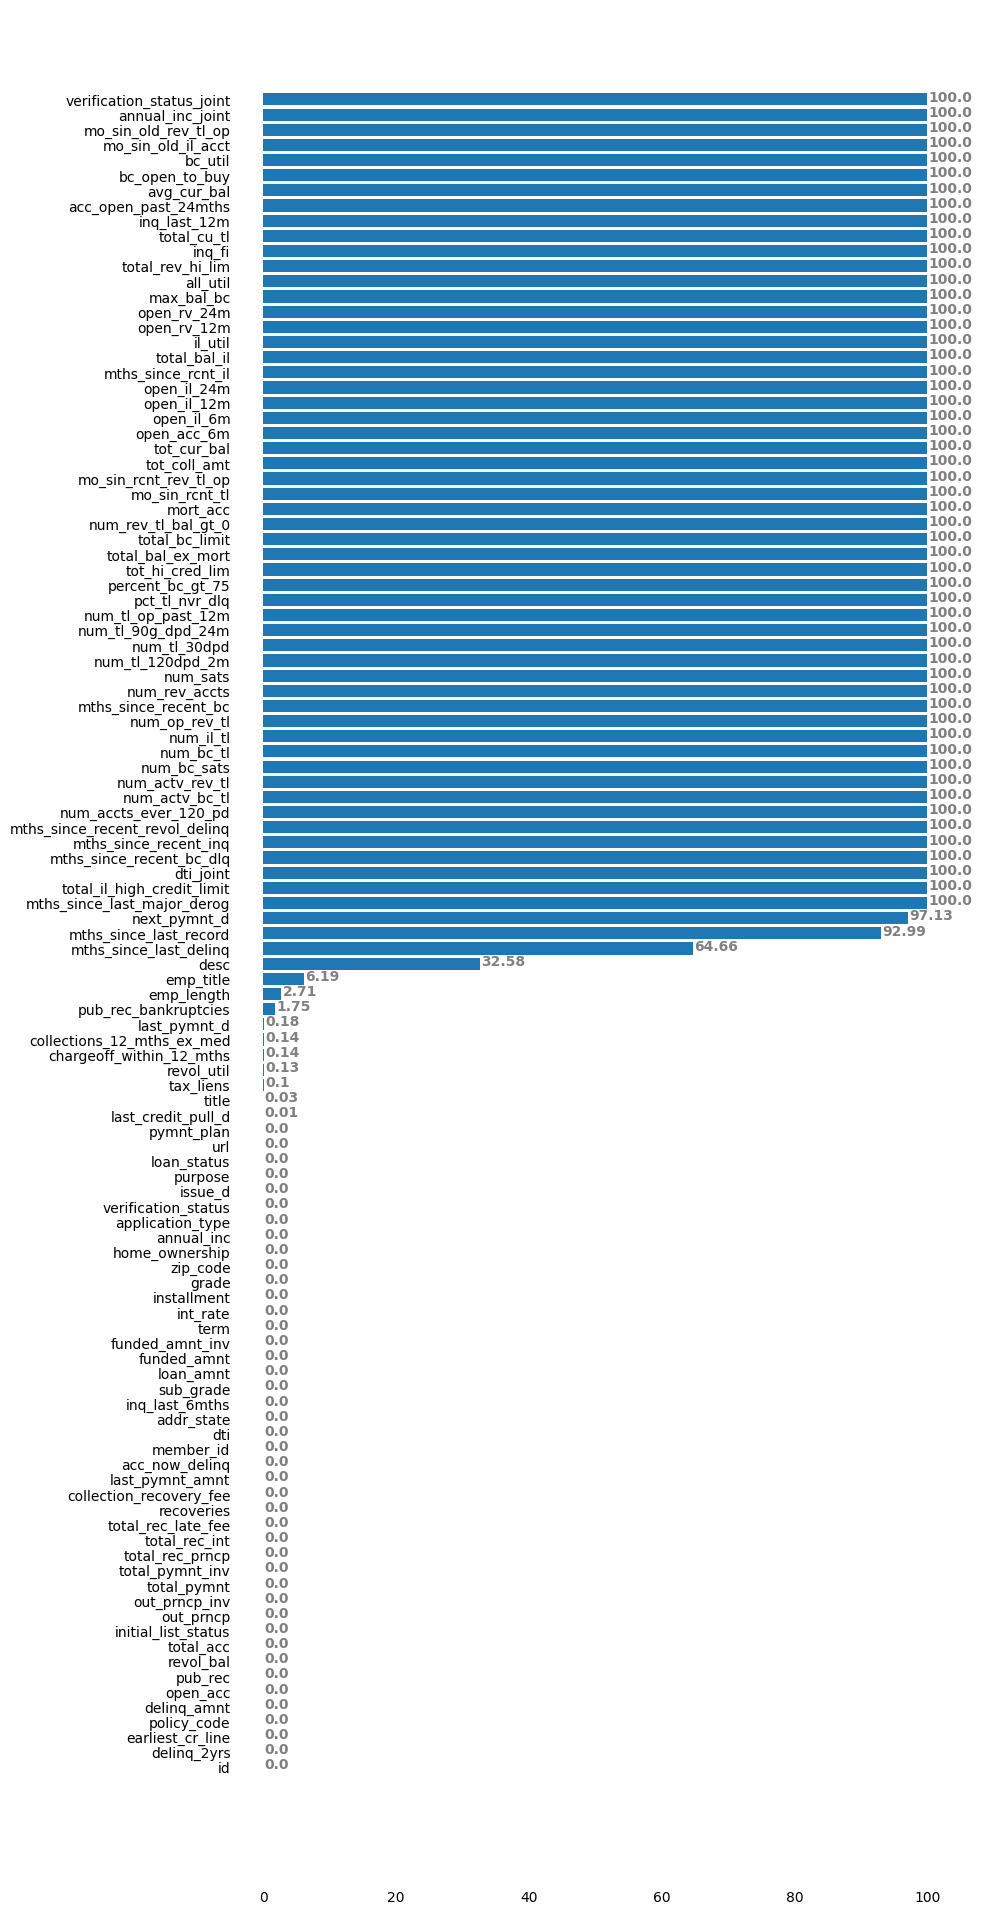

In [5]:
# We measure percentage missing value in per field and introduce a new dataframe to monitor
missing_df = df.isnull().sum() * 100 / len(df)
missing_df.to_frame(name="percent_missing")

missing_df = missing_df.reset_index()
missing_df.columns = ['field', 'percent_missing']
missing_df = missing_df.sort_values(by="percent_missing", ascending=False)

# Figure Size
fig, ax = plt.subplots(figsize =(9, 24))
 
# Horizontal Bar Plot
ax.barh(missing_df["field"], missing_df["percent_missing"])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 20)
ax.yaxis.set_tick_params(pad = 20)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

plt.show()

In [6]:
# We wil remove all field missing value is 100%
df = df.drop(columns=missing_df[missing_df["percent_missing"] == 100]["field"].to_list())
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,Jan-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,Dec-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


#### There are the rest of 15 missing fields

- next_pymnt_d ~= 97%
- mths_since_last_record ~= 93%
- mths_since_last_delinq ~= 67%
- desc ~= 33%
- emp_title ~= 6%
- emp_length ~= 3%
- pub_rec_bankruptcies ~= 2%
- last_pymnt_d ~= 0.1%
- chargeoff_within_12_mths ~= 0.1%
- collections_12_mths_ex_med ~= 0.1%
- revol_util ~= 0.1%
- tax_liens ~= 0.1%
- title ~= 0.1%
- last_credit_pull_d ~= 0.1%


#### Clean field "next_pymnt_d"
- Describe field: Next scheduled payment date
- Cleaning strategies:

In [7]:
df["next_pymnt_d"]

0           NaN
1           NaN
2           NaN
3           NaN
4        Jun-16
          ...  
39712       NaN
39713       NaN
39714       NaN
39715       NaN
39716       NaN
Name: next_pymnt_d, Length: 39717, dtype: object

### Clean field "mths_since_last_record"
- Describe field: The number of months since the last public record.

In [8]:
df["mths_since_last_record"].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
39712    False
39713    False
39714    False
39715    False
39716    False
Name: mths_since_last_record, Length: 39717, dtype: bool

#### Clean field "mths_since_last_delinq"
- Describe field:  The number of months since the borrower's last delinquency.

In [9]:
df["mths_since_last_delinq"].head()

0     NaN
1     NaN
2     NaN
3    35.0
4    38.0
Name: mths_since_last_delinq, dtype: float64

#### Clean field "desc"
- Describe field: Loan description provided by the borrower

In [10]:
df["desc"].head()

0      Borrower added on 12/22/11 > I need to upgra...
1      Borrower added on 12/22/11 > I plan to use t...
2                                                  NaN
3      Borrower added on 12/21/11 > to pay for prop...
4      Borrower added on 12/21/11 > I plan on combi...
Name: desc, dtype: object

#### Clean field "emp_title"
- Describe field: The job title supplied by the Borrower when applying for the loan.*

In [11]:
df["emp_title"].head(10)

0                          NaN
1                        Ryder
2                          NaN
3          AIR RESOURCES BOARD
4     University Medical Group
5         Veolia Transportaton
6    Southern Star Photography
7              MKC Accounting 
8                          NaN
9                    Starbucks
Name: emp_title, dtype: object

#### Clean field "emp_length"
- Describe field: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [12]:
df["emp_length"].head(10)

0    10+ years
1     < 1 year
2    10+ years
3    10+ years
4       1 year
5      3 years
6      8 years
7      9 years
8      4 years
9     < 1 year
Name: emp_length, dtype: object

#### Clean field "pub_rec_bankruptcies" [IMPORTANT]
- Describe field: Number of public record bankruptcies

In [13]:
df["pub_rec_bankruptcies"].head(10)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: pub_rec_bankruptcies, dtype: float64

#### Clean field "last_pymnt_d"
- Describe field: Last month payment was received

In [14]:
df["last_pymnt_d"].head(10)

0    Jan-15
1    Apr-13
2    Jun-14
3    Jan-15
4    May-16
5    Jan-15
6    May-16
7    Jan-15
8    Apr-12
9    Nov-12
Name: last_pymnt_d, dtype: object

#### Clean field "chargeoff_within_12_mths"
- Describe field: Number of charge-offs within 12 months

In [15]:
df["chargeoff_within_12_mths"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: chargeoff_within_12_mths, Length: 39717, dtype: float64

#### Clean field "collections_12_mths_ex_med"
- Describe field: Number of collections in 12 months excluding medical collections

In [16]:
df["collections_12_mths_ex_med"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: collections_12_mths_ex_med, Length: 39717, dtype: float64

#### Clean field "revol_util"
- Describe field: Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [17]:
df["revol_util"]

0        83.70%
1         9.40%
2        98.50%
3           21%
4        53.90%
          ...  
39712    13.10%
39713    26.90%
39714    19.40%
39715     0.70%
39716    51.50%
Name: revol_util, Length: 39717, dtype: object

#### Clean field "tax_liens"
- Describe field: Number of tax liens
- Fill 0

In [18]:
df["tax_liens"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
39712    NaN
39713    NaN
39714    NaN
39715    NaN
39716    NaN
Name: tax_liens, Length: 39717, dtype: float64

#### Clean field "title"
- Describe field: The loan title provided by the borrower

In [19]:
df["title"]

0                         Computer
1                             bike
2             real estate business
3                         personel
4                         Personal
                   ...            
39712             Home Improvement
39713    Retiring credit card debt
39714       MBA Loan Consolidation
39715                     JAL Loan
39716           Consolidation Loan
Name: title, Length: 39717, dtype: object

#### Clean field "last_credit_pull_d"
- Describe field: The most recent month LC pulled credit for this loan

In [20]:
df["last_credit_pull_d"]

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

### 2.2 Address Constant Field

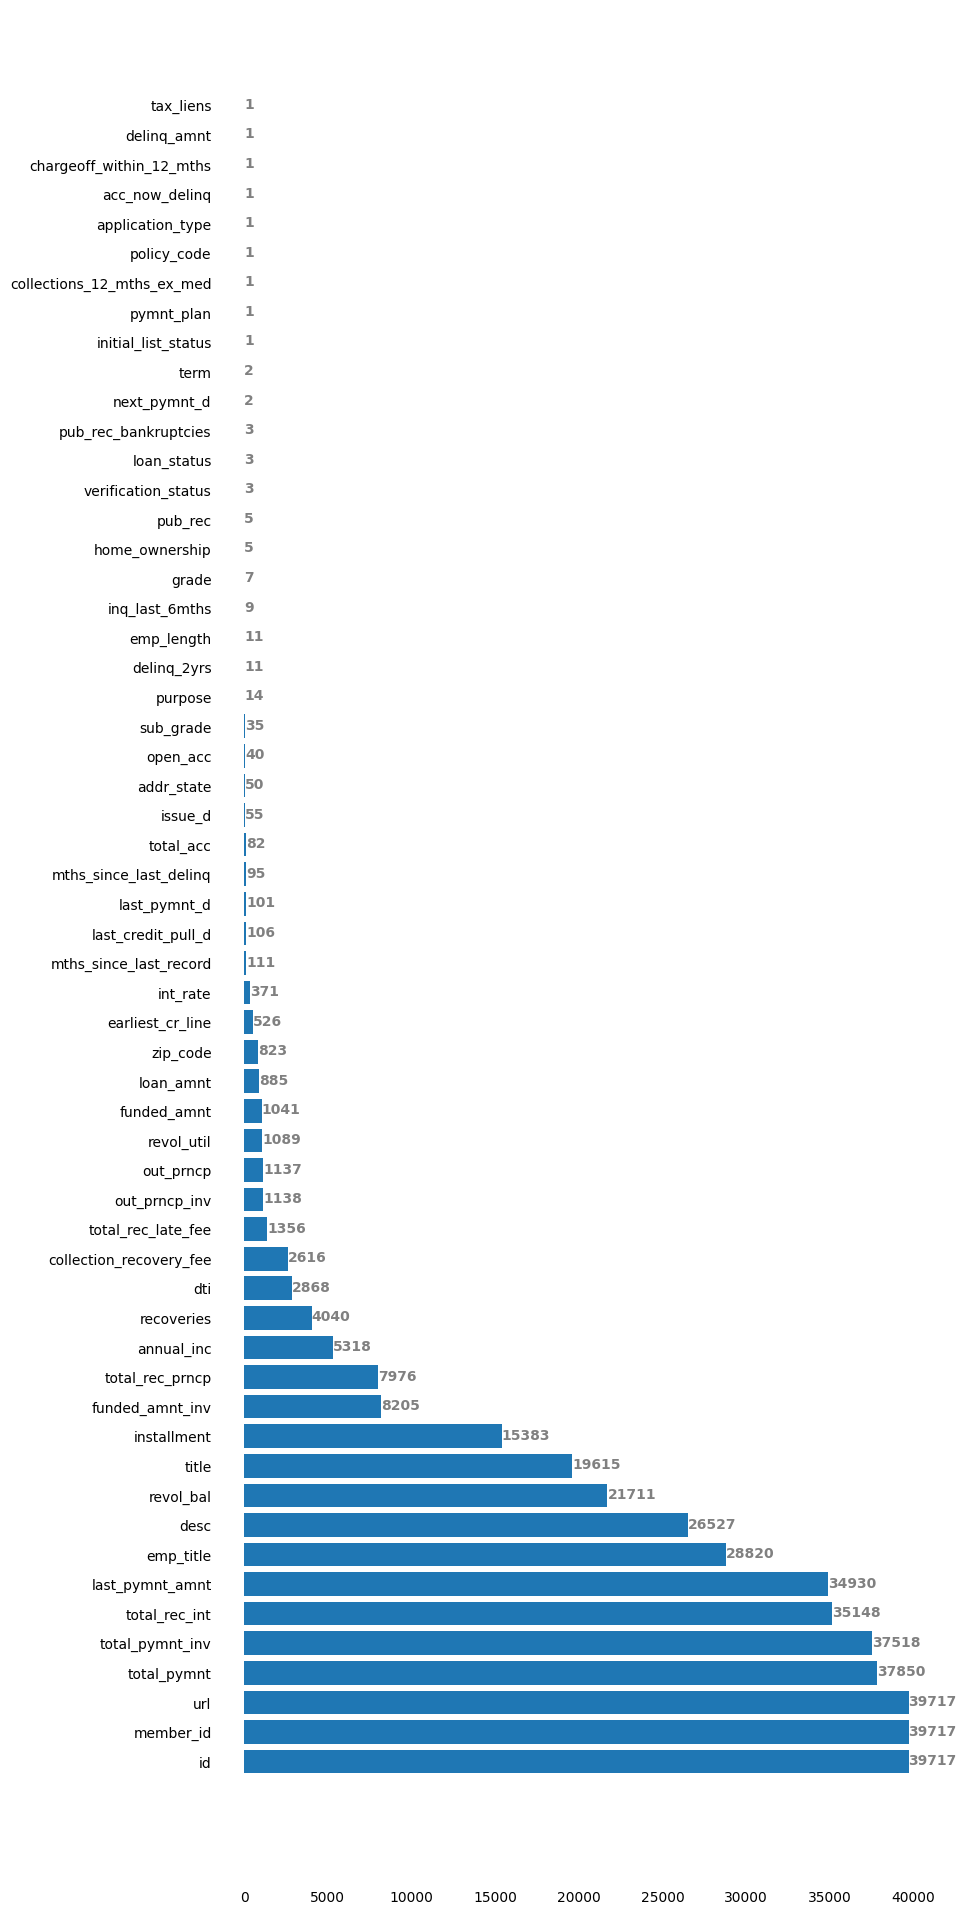

In [21]:
constant_df = df.nunique().to_frame(name='unique_value')
constant_df = constant_df.reset_index()
constant_df = constant_df.rename(columns={'index': 'field'}).sort_values(by='unique_value', ascending=True)

# Figure Size
fig, ax = plt.subplots(figsize =(9, 24))
 
# Horizontal Bar Plot
ax.barh(constant_df["field"], constant_df["unique_value"])

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 20)
ax.yaxis.set_tick_params(pad = 20)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 

plt.show()

### Drop Constant Field Because No Statistic Meaning

In [22]:
df = df.drop(columns=constant_df[constant_df["unique_value"] == 1]["field"].to_list())
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0


### 2.3 Address 100% Unique Field

In [23]:
unique_df = df.nunique() == len(df)
unique_df = unique_df.to_frame(name='is_unique_field')
unique_df = unique_df.reset_index()
unique_df = unique_df.rename(columns={'index': 'field'}).sort_values(by='is_unique_field', ascending=False)
unique_df.head(10)


,field,is_unique_field
0,id,True
17,url,True
1,member_id,True
45,next_pymnt_d,False
44,last_pymnt_amnt,False
26,inq_last_6mths,False
27,mths_since_last_delinq,False
28,mths_since_last_record,False
29,open_acc,False
30,pub_rec,False


### Drop Uniue Field To Avoid Mistake in Segmentation

In [24]:
df = df.drop(columns=unique_df[unique_df["is_unique_field"] == True]["field"].to_list())

df.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,...,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,NaN,Jan-16,0.0
6,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,...,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,NaN,May-16,0.0
7,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,...,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,NaN,Dec-14,0.0
8,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,NaN,4 years,...,162.02,294.94,0.00,189.06,2.09,Apr-12,152.39,NaN,Aug-12,0.0
9,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,Starbucks,< 1 year,...,673.48,533.42,0.00,269.29,2.52,Nov-12,121.45,NaN,Mar-13,0.0


### 2.3 Convert Data Type

In [25]:
def load_type_df(df: pd.DataFrame, filter_type: str = None) -> pd.DataFrame:
    default_type_df = df.dtypes.to_frame(name='default_type')
    default_type_df = default_type_df.reset_index()

    if filter_type:
        default_type_df = default_type_df[default_type_df['default_type'] == filter_type]

    return default_type_df.rename(columns={'index': 'field'})


def assert_datatypes(df: pd.DataFrame) -> pd.DataFrame:

    default_type_df = load_type_df(df)

    # types_df

    expected_type_df = pd.read_csv("expected_datatype.csv")
    types_df = pd.merge(default_type_df, expected_type_df, how='left', on='field')
    return types_df[types_df['default_type'] != types_df['expected_type']]

assert_datatypes(df)



,field,default_type,expected_type
4,int_rate,object,float64
13,issue_d,object,datetime64[ns]
22,earliest_cr_line,object,datetime64[ns]
29,revol_util,object,float64
40,last_pymnt_d,object,datetime64[ns]
42,next_pymnt_d,object,datetime64[ns]
43,last_credit_pull_d,object,datetime64[ns]


In [26]:
def convert_2_percentage(x: typing.Any) -> float:        
    if isinstance(x, str):
        return float(x.replace("%", ""))/100
    return x
    
def convert_to_month(x: typing.Any) -> datetime:
    if isinstance(x, str):
        return datetime.strptime(x, "%b-%y")
    return x

def standardize_free_text(x: str) -> str:
    return str(x).replace(' ', '_').lower()
    


# Standardize percentage fields
df["revol_util"] = df['revol_util'].apply(convert_2_percentage)
df["int_rate"] = df['int_rate'].apply(convert_2_percentage)

# Standardize date files
df["issue_d"] = df["issue_d"].apply(convert_to_month)
df["earliest_cr_line"] = df["earliest_cr_line"].apply(convert_to_month)
df["last_pymnt_d"] = df["last_pymnt_d"].apply(convert_to_month)
df["last_credit_pull_d"] = df["last_credit_pull_d"].apply(convert_to_month)
df["next_pymnt_d"] = df["next_pymnt_d"].apply(convert_to_month)

# Standardize free text field
df['title'] = df['title'].apply(standardize_free_text)
df['desc'] = df['desc'].apply(standardize_free_text)
df['purpose'] = df['purpose'].apply(standardize_free_text)




# Make sure all field cast to expeted datatype
assert len(assert_datatypes(df)) == 0

df['purpose']

0               credit_card
1                       car
2            small_business
3                     other
4                     other
                ...        
39712      home_improvement
39713           credit_card
39714    debt_consolidation
39715                 other
39716    debt_consolidation
Name: purpose, Length: 39717, dtype: object

### 2.3 Manipulate String and Date Fields

## 3. Data Analysis

3.1 The Objective and Structure of Analysis

#### 3.1.1 Business Problems
[TBD]

#### 3.1.2 Analysis Objective
[TBD]

#### 3.1.3 Analysis Actions

- Univariate analysis
    - Unordered categorical variable -> Frequency and ranking -> Scatter plot
    - Ordered categorical variable -> Sort, frequency -> Histogram to see distribution
    - Quantitative variable -> 
        - Descriptive Data Summary
            - Statistic metrics: Q1/2/3, Mean, Median, Mod, Max, Min, Variant, SD
            - Boxplot
- Segmented univariate analysis
    - Group by dimesion 
    - Summarize relevant metrics by mean, median
    - Compare aggregated metrics 
- Bivariate analysis
    - On continuous variables
        - Scatter plot
        - Correlation heatmap metrix
    - On categorical variables
        - Pivot table
- Derived metrics
    - Type-driven metrics
        - Nominal variables
        - Ordinal variables
        - Interval variables
        - Ratio variables
    - Business-driven metrics
    - Data-driven

In [27]:
# Get Unorder categorical variable
print(load_type_df(df, 'object'))

unordered_categorical_field = ['term', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'desc', 'purpose', 'title', 'zip_code', 'addr_state']
ordered_categorical_field = ['grade', 'sub_grade']

                  field default_type
3                  term       object
6                 grade       object
7             sub_grade       object
8             emp_title       object
9            emp_length       object
10       home_ownership       object
12  verification_status       object
14          loan_status       object
15                 desc       object
16              purpose       object
17                title       object
18             zip_code       object
19           addr_state       object


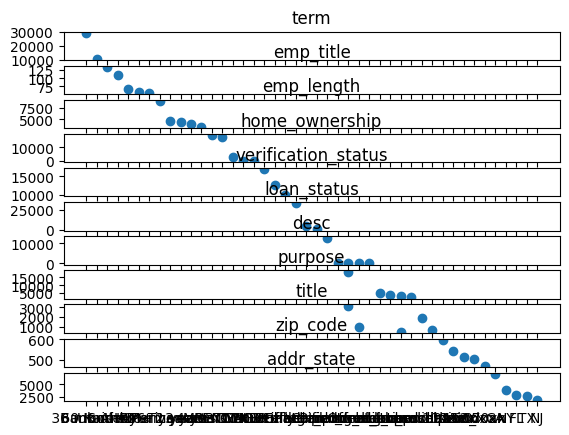

In [50]:

def analyze_unorder_variables(df: pd.DataFrame, columns: list) -> None:


    fig, plots = plt.subplots(len(columns), sharex=True)

    for i in range(len(columns)):

        tmp_df = df[columns[i]]\
            .value_counts()\
                .sort_values()\
                    .to_frame()\
                        .reset_index()\
                            .sort_values(
                                by=columns[i], ascending=False
                                ).head(5)

        
        plots[i].scatter(tmp_df['index'], tmp_df[columns[i]])
        plots[i].set_title(columns[i])


    # plt.subplots_adjust(wspace=0.4)


    plt.show()

analyze_unorder_variables(df, unordered_categorical_field)


(array([10085., 12020.,     0.,  8098.,     0.,  5307.,  2842.,     0.,
         1049.,   316.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

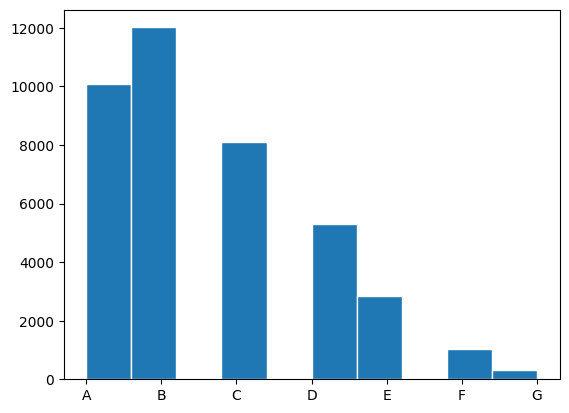

In [56]:
# Get Unorder categorical variable
# grade
plt.hist(df["grade"].sort_values(), edgecolor='w')

(array([6615., 6353., 4539., 6568., 5169., 5578., 2339., 1466.,  760.,
         330.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <BarContainer object of 10 artists>)

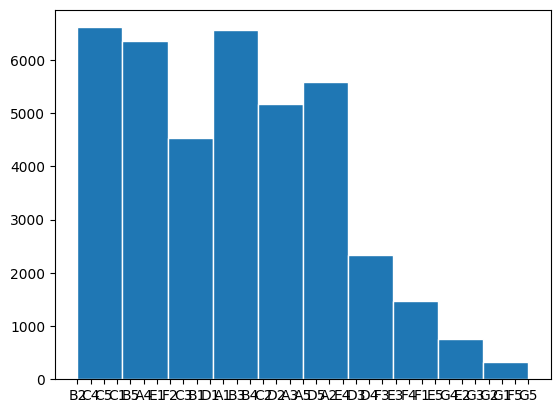

In [60]:
plt.hist(df["sub_grade"].sort_index(), edgecolor='w')

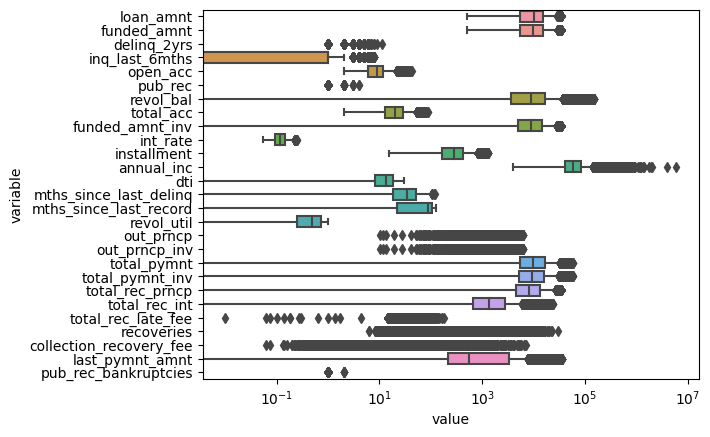

In [83]:
quantitative_columns = pd.concat([load_type_df(df, 'int64'), load_type_df(df, 'float64')])


sns.boxplot(y="variable", x="value", data=pd.melt(df[quantitative_columns['field'].to_list()]))
plt.xscale('log')

plt.show()

### Segmented univariate analysis

In [91]:
# Analyze Loan Amount and Funded Amount by Purpose Segment
df[["purpose", "loan_amnt", "funded_amnt"]].groupby("purpose").agg({"loan_amnt": "mean"})

,loan_amnt
purpose,
car,6777.517753
credit_card,11723.615984
debt_consolidation,12694.989539
educational,6810.461538
home_improvement,11537.205981
house,13070.997375
major_purchase,8155.429813
medical,8263.672439
moving,6650.171527
